<a href="https://colab.research.google.com/github/nahidosen/Group_5_CSE445_3_Spring_21/blob/main/ipynb/Project_icct20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-plot

In [2]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scikitplot as skplt
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [3]:
data = 'https://raw.githubusercontent.com/nahidosen/Group_5_CSE445_3_Spring_21/main/dataset/IT20%20.csv'
t = pd.read_csv(data)
t

,dates,venue,city,home_team,team_1,team_2,total_matches_team1,total_matches_team2,toss_winner,total_wins_team1,total_wins_team2,toss_decision,umpire_1,umpire_2,match_winner,head_to_head,total_loses_team1,total_loses_team2,win_ratio_team1,win_ratio_team2,lose_ratio_team1,lose_ratio_team2
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,NaN,0.0,Australia,NaN,1.0,bat,BF Bowden,AL Hill,Australia,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,NaN,1.0,England,NaN,NaN,bat,NJ Llong,JW Lloyds,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-10-21,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,NaN,NaN,New Zealand,NaN,NaN,field,IL Howell,BG Jerling,New Zealand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,2.0,NaN,Australia,NaN,NaN,bat,BNJ Oxenford,RL Parry,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-02-16,Eden Park,Auckland,New Zealand,West Indies,New Zealand,NaN,NaN,New Zealand,NaN,NaN,field,BF Bowden,AL Hill,New Zealand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2021-03-17,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,NaN,NaN,Zimbabwe,NaN,NaN,field,Aleem Dar,Izatullah Safi,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,2021-03-18,Narendra Modi Stadium,Ahmedabad,India,India,England,NaN,NaN,England,NaN,NaN,field,KN Ananthapadmanabhan,Nitin Menon,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,2021-03-19,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,NaN,NaN,Afghanistan,NaN,NaN,bat,Ahmed Shah Durrani,Aleem Dar,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,2021-03-20,Narendra Modi Stadium,Ahmedabad,India,India,England,NaN,NaN,England,NaN,NaN,field,AK Chaudhary,Nitin Menon,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [4]:
t.columns

Index(['dates', 'venue', 'city', 'home_team', 'team_1', 'team_2',
       'total_matches_team1', 'total_matches_team2', 'toss_winner',
       'total_wins_team1', 'total_wins_team2', 'toss_decision', 'umpire_1',
       'umpire_2', 'match_winner', 'head_to_head', 'total_loses_team1',
       'total_loses_team2', 'win_ratio_team1', 'win_ratio_team2',
       'lose_ratio_team1', 'lose_ratio_team2'],
      dtype='object')

In [5]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dates                971 non-null    object 
 1   venue                971 non-null    object 
 2   city                 971 non-null    object 
 3   home_team            971 non-null    object 
 4   team_1               971 non-null    object 
 5   team_2               971 non-null    object 
 6   total_matches_team1  80 non-null     float64
 7   total_matches_team2  56 non-null     float64
 8   toss_winner          971 non-null    object 
 9   total_wins_team1     0 non-null      float64
 10  total_wins_team2     1 non-null      float64
 11  toss_decision        971 non-null    object 
 12  umpire_1             971 non-null    object 
 13  umpire_2             971 non-null    object 
 14  match_winner         971 non-null    object 
 15  head_to_head         3 non-null      flo

In [6]:
t2 = t
t2 = t.dropna(axis=1)
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dates          971 non-null    object
 1   venue          971 non-null    object
 2   city           971 non-null    object
 3   home_team      971 non-null    object
 4   team_1         971 non-null    object
 5   team_2         971 non-null    object
 6   toss_winner    971 non-null    object
 7   toss_decision  971 non-null    object
 8   umpire_1       971 non-null    object
 9   umpire_2       971 non-null    object
 10  match_winner   971 non-null    object
dtypes: object(11)
memory usage: 83.6+ KB


In [7]:
t2.isnull().sum() 

dates            0
venue            0
city             0
home_team        0
team_1           0
team_2           0
toss_winner      0
toss_decision    0
umpire_1         0
umpire_2         0
match_winner     0
dtype: int64

In [8]:
t2.nunique()

dates            722
venue            138
city             117
home_team         28
team_1            48
team_2            46
toss_winner       46
toss_decision      2
umpire_1         147
umpire_2         152
match_winner      42
dtype: int64

In [9]:
t2['venue'].value_counts().sort_index()

AMI Stadium                                               3
Adelaide Oval                                             5
Al Amerat Cricket Ground Oman Cricket Ministry Turf 1    19
Al Amerat Cricket Ground Oman Cricket Ministry Turf 2     3
Amini Park                                                6
                                                         ..
Western Australia Cricket Association Ground              2
Westpac Stadium                                          14
White Hill Field                                          8
Windsor Park                                              2
Zahur Ahmed Chowdhury Stadium                            20
Name: venue, Length: 138, dtype: int64

In [10]:
#ipl_2 = ipl
#ipl_2['city'] = ipl_2['city'].replace('Bengaluru', 'Bangalore')
#ipl_2['city'].value_counts().sort_index()

In [11]:
t2['city'].sort_values().unique()

array(['Abu Dhabi', 'Adelaide', 'Ahmedabad', 'Al Amarat', 'Amstelveen',
       'Antigua', 'Auckland', 'Bangalore', 'Bangkok', 'Barbados',
       'Basseterre', 'Belfast', 'Birmingham', 'Bloemfontein', 'Bready',
       'Brisbane', 'Bristol', 'Bulawayo', 'Canberra', 'Cape Town',
       'Cardiff', 'Carrara', 'Castel', 'Centurion', 'Chandigarh',
       'Chennai', 'Chester-le-Street', 'Chittagong', 'Christchurch',
       'Colombo', 'Coolidge', 'Cuttack', 'Dehradun', 'Delhi', 'Derry',
       'Deventer', 'Dhaka', 'Dharamsala', 'Dominica', 'Dubai', 'Dublin',
       'Dunedin', 'Durban', 'East London', 'Edinburgh', 'Fatullah',
       'Greater Noida', 'Gros Islet', 'Guwahati', 'Guyana', 'Hambantota',
       'Hamilton', 'Harare', 'Hobart', 'Hong Kong', 'Hyderabad', 'Indore',
       'Jamaica', 'Johannesburg', 'Kampala', 'Kandy', 'Kanpur', 'Karachi',
       'Khulna', 'Kimberley', 'King City', 'Kirtipur', 'Kolkata',
       'Kuala Lumpur', 'Lahore', 'Lauderhill', 'London', 'Londonderry',
       'Luckno

In [12]:
t2['home_team'].value_counts().sort_index()

Australia                46
Bangladesh               38
Bermuda                   5
England                  48
Guernsey                  2
Hong Kong                 2
India                    51
Ireland                  16
Kenya                     5
Malaysia                 15
Namibia                   4
Nepal                     3
Netherlands              12
New Zealand              70
Oman                      7
Pakistan                 18
Papua New Guinea          4
Romania                   3
Scotland                  5
Singapore                 6
South Africa             62
Sri Lanka                42
Thailand                  4
Uganda                    4
United Arab Emirates     27
West Indies              43
Zimbabwe                 24
none                    405
Name: home_team, dtype: int64

In [13]:
#ipl_2['venue'] = ipl_2['venue'].replace('M Chinnaswamy Stadium', 'M. Chinnaswamy Stadium')
#ipl_2['venue'].value_counts().sort_index()

In [14]:
t2['team_1'].value_counts().sort_index()

Afghanistan                 62
Australia                   80
Bahrain                      1
Bangladesh                  56
Bermuda                     10
Bhutan                       1
Botswana                     2
Bulgaria                     2
Canada                      19
Cayman Islands               2
Denmark                      5
England                     70
Germany                      3
Ghana                        3
Guernsey                     4
Hong Kong                   27
India                       77
Iran                         1
Ireland                     43
Isle of Man                  1
Italy                        1
Jersey                       3
Kenya                       16
Kuwait                       5
Malaysia                    17
Maldives                     3
Namibia                     10
Nepal                       10
Netherlands                 28
New Zealand                 81
Nigeria                      1
Oman                        10
Pakistan

In [15]:
t2['team_2'].value_counts().sort_index()

Afghanistan                  16
Australia                    56
Bahrain                       1
Bangladesh                   35
Bermuda                       2
Bhutan                        1
Botswana                      5
Bulgaria                      1
Canada                        2
Cayman Islands                4
Denmark                       1
England                      61
Germany                       2
Ghana                         1
Guernsey                      2
Hong Kong                    15
India                        63
Ireland                      43
Italy                         3
Jersey                        7
Kenya                        12
Kuwait                        1
Malaysia                      5
Maldives                      4
Namibia                       6
Nepal                        21
Netherlands                  36
New Zealand                  61
Nigeria                       7
Norway                        4
Oman                         21
Pakistan

In [16]:
t2['toss_winner'].value_counts().sort_index()

Afghanistan                 39
Australia                   73
Bahrain                      1
Bangladesh                  48
Bermuda                      5
Bhutan                       1
Botswana                     5
Bulgaria                     2
Canada                      10
Cayman Islands               3
Denmark                      4
England                     66
Germany                      4
Ghana                        3
Guernsey                     3
Hong Kong                   22
India                       64
Ireland                     48
Isle of Man                  1
Italy                        2
Jersey                       4
Kenya                       14
Kuwait                       2
Malaysia                    14
Maldives                     1
Namibia                      7
Nepal                       13
Netherlands                 33
New Zealand                 69
Nigeria                      4
Oman                        18
Pakistan                    79
Papua Ne

In [17]:
t2['toss_decision'].value_counts().sort_index()

bat      472
field    499
Name: toss_decision, dtype: int64

In [18]:
t2['umpire_1'].value_counts().sort_index()

A Kapa            3
A Louw            3
A Paleker        19
AG Wharf          6
AJ Neill          2
                 ..
V Kalidas        11
VA Kulkarni      10
Vinod Babu        2
WPM van Liemt     1
Zaidan Taha       2
Name: umpire_1, Length: 147, dtype: int64

In [19]:
t2['umpire_2'].value_counts().sort_index()

A Begg            1
A Louw            1
A Natarajan       2
A Paleker         1
AG Wharf         14
                 ..
VK Sharma         2
Vinod Babu        3
WPM van Liemt     2
WR Knights       23
Zameer Haider    12
Name: umpire_2, Length: 152, dtype: int64

In [20]:
t2['match_winner'].value_counts().sort_index()

Afghanistan                 54
Australia                   72
Bahrain                      1
Bangladesh                  30
Bermuda                      5
Bulgaria                     1
Canada                       8
Denmark                      2
England                     70
Germany                      4
Guernsey                     4
Hong Kong                   15
India                       90
Ireland                     39
Italy                        2
Jersey                       6
Kenya                       11
Kuwait                       3
Malaysia                    12
Maldives                     2
Namibia                     12
Nepal                       16
Netherlands                 36
New Zealand                 77
Nigeria                      2
Oman                        14
Pakistan                    98
Papua New Guinea            13
Philippines                  1
Qatar                        2
Romania                      2
Scotland                    23
Singapor

In [21]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dates          971 non-null    object
 1   venue          971 non-null    object
 2   city           971 non-null    object
 3   home_team      971 non-null    object
 4   team_1         971 non-null    object
 5   team_2         971 non-null    object
 6   toss_winner    971 non-null    object
 7   toss_decision  971 non-null    object
 8   umpire_1       971 non-null    object
 9   umpire_2       971 non-null    object
 10  match_winner   971 non-null    object
dtypes: object(11)
memory usage: 83.6+ KB


In [22]:
t2 = t2.drop_duplicates(keep = 'first')
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dates          971 non-null    object
 1   venue          971 non-null    object
 2   city           971 non-null    object
 3   home_team      971 non-null    object
 4   team_1         971 non-null    object
 5   team_2         971 non-null    object
 6   toss_winner    971 non-null    object
 7   toss_decision  971 non-null    object
 8   umpire_1       971 non-null    object
 9   umpire_2       971 non-null    object
 10  match_winner   971 non-null    object
dtypes: object(11)
memory usage: 91.0+ KB


In [23]:
t2['dates'] = pd.to_datetime(t2['dates'])
t2['year'] = t2['dates'].dt.year
t2['month'] = t2['dates'].dt.month
t2['day'] = t2['dates'].dt.day
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dates          971 non-null    datetime64[ns]
 1   venue          971 non-null    object        
 2   city           971 non-null    object        
 3   home_team      971 non-null    object        
 4   team_1         971 non-null    object        
 5   team_2         971 non-null    object        
 6   toss_winner    971 non-null    object        
 7   toss_decision  971 non-null    object        
 8   umpire_1       971 non-null    object        
 9   umpire_2       971 non-null    object        
 10  match_winner   971 non-null    object        
 11  year           971 non-null    int64         
 12  month          971 non-null    int64         
 13  day            971 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 113.8+ KB


In [24]:
print(min(t2['dates']))
print(max(t2['dates']))

2005-02-17 00:00:00
2021-03-20 00:00:00


In [25]:
t3 = t2
t3 = t3.drop(['dates'], axis = 1)
t3

,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner,year,month,day
0,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia,2005,2,17
1,The Rose Bowl,Southampton,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England,2005,6,13
2,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand,2005,10,21
3,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia,2006,1,9
4,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand,2006,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,Zimbabwe,field,Aleem Dar,Izatullah Safi,Afghanistan,2021,3,17
967,Narendra Modi Stadium,Ahmedabad,India,India,England,England,field,KN Ananthapadmanabhan,Nitin Menon,India,2021,3,18
968,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,Afghanistan,bat,Ahmed Shah Durrani,Aleem Dar,Afghanistan,2021,3,19
969,Narendra Modi Stadium,Ahmedabad,India,India,England,England,field,AK Chaudhary,Nitin Menon,India,2021,3,20


In [26]:
t3.columns

Index(['venue', 'city', 'home_team', 'team_1', 'team_2', 'toss_winner',
       'toss_decision', 'umpire_1', 'umpire_2', 'match_winner', 'year',
       'month', 'day'],
      dtype='object')

In [27]:
t3 = t3[['year', 'month', 'day', 'city', 'venue', 'home_team', 'team_1', 'team_2', 'toss_winner',
       'toss_decision', 'umpire_1', 'umpire_2', 'match_winner']]
t3

,year,month,day,city,venue,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005,2,17,Auckland,Eden Park,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
1,2005,6,13,Southampton,The Rose Bowl,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
2,2005,10,21,Johannesburg,New Wanderers Stadium,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand
3,2006,1,9,Brisbane,Brisbane Cricket Ground,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
4,2006,2,16,Auckland,Eden Park,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2021,3,17,Abu Dhabi,Sheikh Zayed Stadium,none,Afghanistan,Zimbabwe,Zimbabwe,field,Aleem Dar,Izatullah Safi,Afghanistan
967,2021,3,18,Ahmedabad,Narendra Modi Stadium,India,India,England,England,field,KN Ananthapadmanabhan,Nitin Menon,India
968,2021,3,19,Abu Dhabi,Sheikh Zayed Stadium,none,Afghanistan,Zimbabwe,Afghanistan,bat,Ahmed Shah Durrani,Aleem Dar,Afghanistan
969,2021,3,20,Ahmedabad,Narendra Modi Stadium,India,India,England,England,field,AK Chaudhary,Nitin Menon,India


In [28]:
t3.columns

Index(['year', 'month', 'day', 'city', 'venue', 'home_team', 'team_1',
       'team_2', 'toss_winner', 'toss_decision', 'umpire_1', 'umpire_2',
       'match_winner'],
      dtype='object')

In [29]:
team1 = t3['team_1'].sort_values().unique()
team1

array(['Afghanistan', 'Australia', 'Bahrain', 'Bangladesh', 'Bermuda',
       'Bhutan', 'Botswana', 'Bulgaria', 'Canada', 'Cayman Islands',
       'Denmark', 'England', 'Germany', 'Ghana', 'Guernsey', 'Hong Kong',
       'India', 'Iran', 'Ireland', 'Isle of Man', 'Italy', 'Jersey',
       'Kenya', 'Kuwait', 'Malaysia', 'Maldives', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nigeria', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Qatar', 'Romania',
       'Saudi Arabia', 'Scotland', 'Singapore', 'South Africa',
       'Sri Lanka', 'Thailand', 'Uganda', 'United Arab Emirates',
       'United States of America', 'West Indies', 'Zimbabwe'],
      dtype=object)

In [30]:
t3['team_2'].sort_values().unique()

array(['Afghanistan', 'Australia', 'Bahrain', 'Bangladesh', 'Bermuda',
       'Bhutan', 'Botswana', 'Bulgaria', 'Canada', 'Cayman Islands',
       'Denmark', 'England', 'Germany', 'Ghana', 'Guernsey', 'Hong Kong',
       'India', 'Ireland', 'Italy', 'Jersey', 'Kenya', 'Kuwait',
       'Malaysia', 'Maldives', 'Namibia', 'Nepal', 'Netherlands',
       'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Qatar', 'Romania', 'Scotland',
       'Singapore', 'South Africa', 'Sri Lanka', 'Thailand',
       'United Arab Emirates', 'United States of America', 'Vanuatu',
       'West Indies', 'Zimbabwe'], dtype=object)

In [31]:
t3['toss_winner'].sort_values().unique()

array(['Afghanistan', 'Australia', 'Bahrain', 'Bangladesh', 'Bermuda',
       'Bhutan', 'Botswana', 'Bulgaria', 'Canada', 'Cayman Islands',
       'Denmark', 'England', 'Germany', 'Ghana', 'Guernsey', 'Hong Kong',
       'India', 'Ireland', 'Isle of Man', 'Italy', 'Jersey', 'Kenya',
       'Kuwait', 'Malaysia', 'Maldives', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nigeria', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Qatar', 'Romania', 'Scotland',
       'Singapore', 'South Africa', 'Sri Lanka', 'Thailand',
       'United Arab Emirates', 'United States of America', 'Vanuatu',
       'West Indies', 'Zimbabwe'], dtype=object)

In [32]:
winner = t3['match_winner'].sort_values().unique()
winner

array(['Afghanistan', 'Australia', 'Bahrain', 'Bangladesh', 'Bermuda',
       'Bulgaria', 'Canada', 'Denmark', 'England', 'Germany', 'Guernsey',
       'Hong Kong', 'India', 'Ireland', 'Italy', 'Jersey', 'Kenya',
       'Kuwait', 'Malaysia', 'Maldives', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nigeria', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Qatar', 'Romania', 'Scotland',
       'Singapore', 'South Africa', 'Sri Lanka', 'Thailand', 'Uganda',
       'United Arab Emirates', 'United States of America', 'Vanuatu',
       'West Indies', 'Zimbabwe'], dtype=object)

In [33]:
t4 = t3
t4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           971 non-null    int64 
 1   month          971 non-null    int64 
 2   day            971 non-null    int64 
 3   city           971 non-null    object
 4   venue          971 non-null    object
 5   home_team      971 non-null    object
 6   team_1         971 non-null    object
 7   team_2         971 non-null    object
 8   toss_winner    971 non-null    object
 9   toss_decision  971 non-null    object
 10  umpire_1       971 non-null    object
 11  umpire_2       971 non-null    object
 12  match_winner   971 non-null    object
dtypes: int64(3), object(10)
memory usage: 106.2+ KB


In [34]:
t4['team_1'].nunique()

48

In [35]:
t4['team_2'].nunique()

46

In [36]:
t4['toss_winner'].nunique()

46

In [37]:
t4['match_winner'].nunique()

42

In [38]:
t4['match_winner'].value_counts()

Pakistan                    98
India                       90
New Zealand                 77
Australia                   72
South Africa                71
England                     70
Sri Lanka                   59
West Indies                 58
Afghanistan                 54
Ireland                     39
Netherlands                 36
Bangladesh                  30
Scotland                    23
United Arab Emirates        21
Zimbabwe                    17
Nepal                       16
Hong Kong                   15
Oman                        14
Papua New Guinea            13
Namibia                     12
Malaysia                    12
Kenya                       11
Singapore                    9
Canada                       8
Jersey                       6
Bermuda                      5
Germany                      4
Vanuatu                      4
Guernsey                     4
Kuwait                       3
Italy                        2
Denmark                      2
United S

In [39]:
t4['home_team'].value_counts()

none                    405
New Zealand              70
South Africa             62
India                    51
England                  48
Australia                46
West Indies              43
Sri Lanka                42
Bangladesh               38
United Arab Emirates     27
Zimbabwe                 24
Pakistan                 18
Ireland                  16
Malaysia                 15
Netherlands              12
Oman                      7
Singapore                 6
Kenya                     5
Bermuda                   5
Scotland                  5
Papua New Guinea          4
Thailand                  4
Uganda                    4
Namibia                   4
Romania                   3
Nepal                     3
Hong Kong                 2
Guernsey                  2
Name: home_team, dtype: int64

In [40]:
neverwon = np.setdiff1d(team1, winner)
neverwon

array(['Bhutan', 'Botswana', 'Cayman Islands', 'Ghana', 'Iran',
       'Isle of Man', 'Saudi Arabia'], dtype=object)

In [41]:
# Creating Dictionaries

team_encodings = {
    'Pakistan'                    : 98,
    'India'                       : 90,
    'New Zealand'                 : 77,
    'Australia'                   : 72,
    'South Africa'                : 71,
    'England'                     : 70,
    'Sri Lanka'                   : 59,
    'West Indies'                 : 58,
    'Afghanistan'                 : 54,
    'Ireland'                     : 41,
    'Netherlands'                 : 40,
    'Bangladesh'                  : 39,
    'Scotland'                    : 38,
    'United Arab Emirates'        : 37,
    'Zimbabwe'                    : 36,
    'Nepal'                       : 35,
    'Hong Kong'                   : 34,
    'Oman'                        : 33,
    'Papua New Guinea'            : 32,
    'Malaysia'                    : 31,
    'Namibia'                     : 30,
    'Kenya'                       : 29,
    'Singapore'                   : 28,
    'Canada'                      : 27,
    'Jersey'                      : 26,
    'Bermuda'                     : 25,
    'Germany'                     : 24,
    'Guernsey'                    : 23,
    'Vanuatu'                     : 22,
    'Kuwait'                      : 21,
    'Qatar'                       : 20,
    'Denmark'                     : 19,
    'Romania'                     : 18,
    'Italy'                       : 17,
    'Maldives'                    : 16,
    'Uganda'                      : 15,
    'Nigeria'                     : 14,
    'United States of America'    : 13,
    'Philippines'                 : 12,
    'Thailand'                    : 11,    
    'Bahrain'                     : 10,    
    'Bulgaria'                    : 9,
    'Norway'                      : 8,
    'Bhutan'                      : 7,
    'Botswana'                    : 6,
    'Cayman Islands'              : 5,
    'Ghana'                       : 4,
    'Iran'                        : 3,
    'Isle of Man'                 : 2,
    'Saudi Arabia'                : 1,
    'none'                        : 0
}

team_encode_dict = {
    'all_teams': team_encodings,
    'team_1': team_encodings,
    'team_2': team_encodings,
    'home_team': team_encodings,
    'toss_winner': team_encodings,
    'match_winner': team_encodings
}
t4.replace(team_encode_dict, inplace=True)
t4

,year,month,day,city,venue,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005,2,17,Auckland,Eden Park,77,77,72,72,bat,BF Bowden,AL Hill,72
1,2005,6,13,Southampton,The Rose Bowl,70,70,72,70,bat,NJ Llong,JW Lloyds,70
2,2005,10,21,Johannesburg,New Wanderers Stadium,71,71,77,77,field,IL Howell,BG Jerling,77
3,2006,1,9,Brisbane,Brisbane Cricket Ground,72,72,71,72,bat,BNJ Oxenford,RL Parry,72
4,2006,2,16,Auckland,Eden Park,77,58,77,77,field,BF Bowden,AL Hill,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2021,3,17,Abu Dhabi,Sheikh Zayed Stadium,0,54,36,36,field,Aleem Dar,Izatullah Safi,54
967,2021,3,18,Ahmedabad,Narendra Modi Stadium,90,90,70,70,field,KN Ananthapadmanabhan,Nitin Menon,90
968,2021,3,19,Abu Dhabi,Sheikh Zayed Stadium,0,54,36,54,bat,Ahmed Shah Durrani,Aleem Dar,54
969,2021,3,20,Ahmedabad,Narendra Modi Stadium,90,90,70,70,field,AK Chaudhary,Nitin Menon,90


In [42]:
print(team_encode_dict['all_teams'])

{'Pakistan': 98, 'India': 90, 'New Zealand': 77, 'Australia': 72, 'South Africa': 71, 'England': 70, 'Sri Lanka': 59, 'West Indies': 58, 'Afghanistan': 54, 'Ireland': 41, 'Netherlands': 40, 'Bangladesh': 39, 'Scotland': 38, 'United Arab Emirates': 37, 'Zimbabwe': 36, 'Nepal': 35, 'Hong Kong': 34, 'Oman': 33, 'Papua New Guinea': 32, 'Malaysia': 31, 'Namibia': 30, 'Kenya': 29, 'Singapore': 28, 'Canada': 27, 'Jersey': 26, 'Bermuda': 25, 'Germany': 24, 'Guernsey': 23, 'Vanuatu': 22, 'Kuwait': 21, 'Qatar': 20, 'Denmark': 19, 'Romania': 18, 'Italy': 17, 'Maldives': 16, 'Uganda': 15, 'Nigeria': 14, 'United States of America': 13, 'Philippines': 12, 'Thailand': 11, 'Bahrain': 10, 'Bulgaria': 9, 'Norway': 8, 'Bhutan': 7, 'Botswana': 6, 'Cayman Islands': 5, 'Ghana': 4, 'Iran': 3, 'Isle of Man': 2, 'Saudi Arabia': 1, 'none': 0}


In [43]:
t4['team_1'].value_counts()

77    81
72    80
90    77
70    70
71    69
54    62
98    57
39    56
59    51
58    51
41    43
36    28
40    28
34    27
37    27
27    19
31    17
29    16
30    10
35    10
33    10
25    10
38     7
28     6
21     5
32     5
19     5
11     4
15     4
23     4
4      3
12     3
16     3
26     3
24     3
13     2
9      2
6      2
5      2
17     1
14     1
18     1
20     1
10     1
7      1
3      1
2      1
1      1
Name: team_1, dtype: int64

In [44]:
t4['team_2'].value_counts()

98    100
58     78
59     77
90     63
77     61
70     61
71     57
72     56
36     49
41     43
38     42
40     36
39     35
35     21
33     21
37     18
54     16
32     15
34     15
29     12
22      9
28      9
14      7
26      7
30      6
13      6
6       5
31      5
20      5
5       4
8       4
11      4
16      4
17      3
27      2
18      2
23      2
24      2
25      2
19      1
12      1
21      1
10      1
9       1
7       1
4       1
Name: team_2, dtype: int64

In [45]:
t4['home_team'].value_counts()

0     405
77     70
71     62
90     51
70     48
72     46
58     43
59     42
39     38
37     27
36     24
98     18
41     16
31     15
40     12
33      7
28      6
38      5
29      5
25      5
32      4
30      4
15      4
11      4
18      3
35      3
34      2
23      2
Name: home_team, dtype: int64

In [46]:
t4['toss_winner'].value_counts()

98    79
72    73
77    69
58    67
70    66
90    64
71    60
59    58
41    48
39    48
36    39
54    39
40    33
37    25
34    22
38    19
33    18
31    14
29    14
35    13
32    11
28    10
27    10
30     7
11     7
22     6
25     5
6      5
26     4
24     4
19     4
14     4
5      3
13     3
4      3
23     3
17     2
20     2
21     2
9      2
7      1
16     1
10     1
12     1
18     1
2      1
Name: toss_winner, dtype: int64

In [47]:
t4['match_winner'].value_counts()

98    98
90    90
77    77
72    72
71    71
70    70
59    59
58    58
54    54
41    39
40    36
39    30
38    23
37    21
36    17
35    16
34    15
33    14
32    13
31    12
30    12
29    11
28     9
27     8
26     6
25     5
24     4
23     4
22     4
21     3
16     2
13     2
14     2
15     2
18     2
17     2
19     2
20     2
12     1
11     1
10     1
9      1
Name: match_winner, dtype: int64

In [48]:
t4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           971 non-null    int64 
 1   month          971 non-null    int64 
 2   day            971 non-null    int64 
 3   city           971 non-null    object
 4   venue          971 non-null    object
 5   home_team      971 non-null    int64 
 6   team_1         971 non-null    int64 
 7   team_2         971 non-null    int64 
 8   toss_winner    971 non-null    int64 
 9   toss_decision  971 non-null    object
 10  umpire_1       971 non-null    object
 11  umpire_2       971 non-null    object
 12  match_winner   971 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 106.2+ KB


In [49]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city', 'venue', 'toss_decision', 'umpire_1', 'umpire_2']
encoder = LabelEncoder()
for ftr in ftr_list:
    t4[ftr] = encoder.fit_transform(t4[ftr])
    print(encoder.classes_)

t4

['Abu Dhabi' 'Adelaide' 'Ahmedabad' 'Al Amarat' 'Amstelveen' 'Antigua'
 'Auckland' 'Bangalore' 'Bangkok' 'Barbados' 'Basseterre' 'Belfast'
 'Birmingham' 'Bloemfontein' 'Bready' 'Brisbane' 'Bristol' 'Bulawayo'
 'Canberra' 'Cape Town' 'Cardiff' 'Carrara' 'Castel' 'Centurion'
 'Chandigarh' 'Chennai' 'Chester-le-Street' 'Chittagong' 'Christchurch'
 'Colombo' 'Coolidge' 'Cuttack' 'Dehradun' 'Delhi' 'Derry' 'Deventer'
 'Dhaka' 'Dharamsala' 'Dominica' 'Dubai' 'Dublin' 'Dunedin' 'Durban'
 'East London' 'Edinburgh' 'Fatullah' 'Greater Noida' 'Gros Islet'
 'Guwahati' 'Guyana' 'Hambantota' 'Hamilton' 'Harare' 'Hobart' 'Hong Kong'
 'Hyderabad' 'Indore' 'Jamaica' 'Johannesburg' 'Kampala' 'Kandy' 'Kanpur'
 'Karachi' 'Khulna' 'Kimberley' 'King City' 'Kirtipur' 'Kolkata'
 'Kuala Lumpur' 'Lahore' 'Lauderhill' 'London' 'Londonderry' 'Lucknow'
 'Manchester' 'Melbourne' 'Mirpur' 'Moara Vlasiei' 'Mombasa'
 'Mount Maunganui' 'Mumbai' 'Nagpur' 'Nairobi' 'Napier' 'Nelson'
 'Nottingham' 'Paarl' 'Perth' 'Port E

,year,month,day,city,venue,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005,2,17,6,31,77,77,72,72,0,26,8,72
1,2005,6,13,99,119,70,70,72,70,0,91,69,70
2,2005,10,21,58,77,71,71,77,77,1,60,25,77
3,2006,1,9,15,17,72,72,71,72,0,28,112,72
4,2006,2,16,6,31,77,58,77,77,1,26,8,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2021,3,17,0,103,0,54,36,36,1,18,63,54
967,2021,3,18,2,74,90,90,70,70,1,70,94,90
968,2021,3,19,0,103,0,54,36,54,0,13,18,54
969,2021,3,20,2,74,90,90,70,70,1,6,94,90


In [50]:
t4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           971 non-null    int64
 1   month          971 non-null    int64
 2   day            971 non-null    int64
 3   city           971 non-null    int64
 4   venue          971 non-null    int64
 5   home_team      971 non-null    int64
 6   team_1         971 non-null    int64
 7   team_2         971 non-null    int64
 8   toss_winner    971 non-null    int64
 9   toss_decision  971 non-null    int64
 10  umpire_1       971 non-null    int64
 11  umpire_2       971 non-null    int64
 12  match_winner   971 non-null    int64
dtypes: int64(13)
memory usage: 106.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fdda525d0>,
      dtype=object)

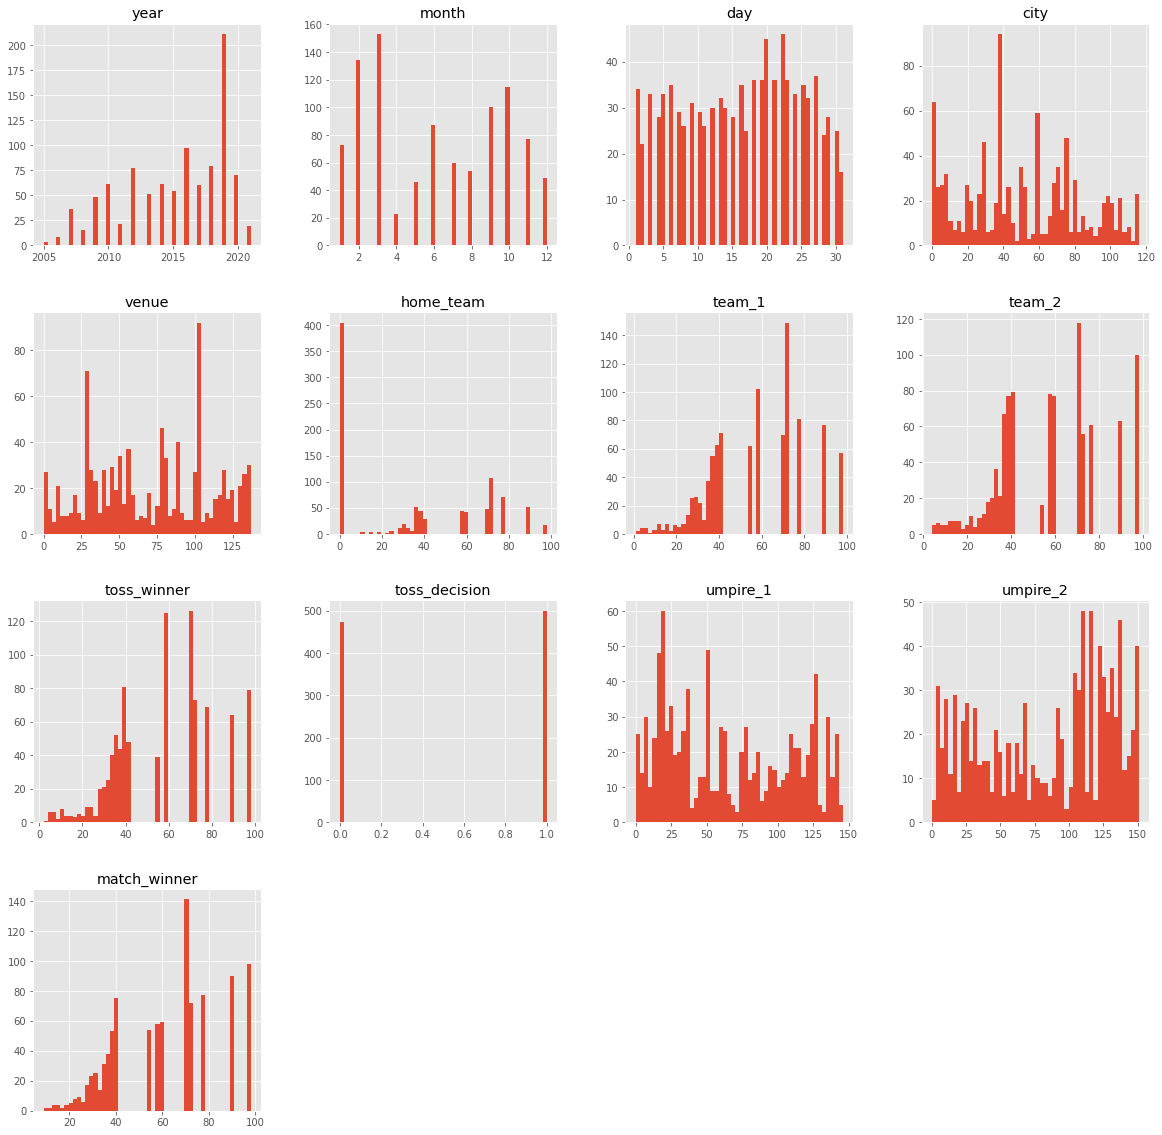

In [51]:
t4.hist(bins = 50, figsize = (20,20))

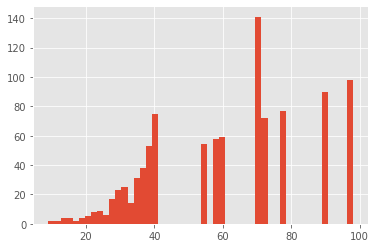

In [52]:
t4['match_winner'].hist(bins=50)

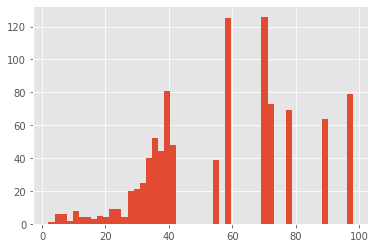

In [53]:
t4['toss_winner'].hist(bins=50)

In [54]:
t4.isnull().sum()

year             0
month            0
day              0
city             0
venue            0
home_team        0
team_1           0
team_2           0
toss_winner      0
toss_decision    0
umpire_1         0
umpire_2         0
match_winner     0
dtype: int64

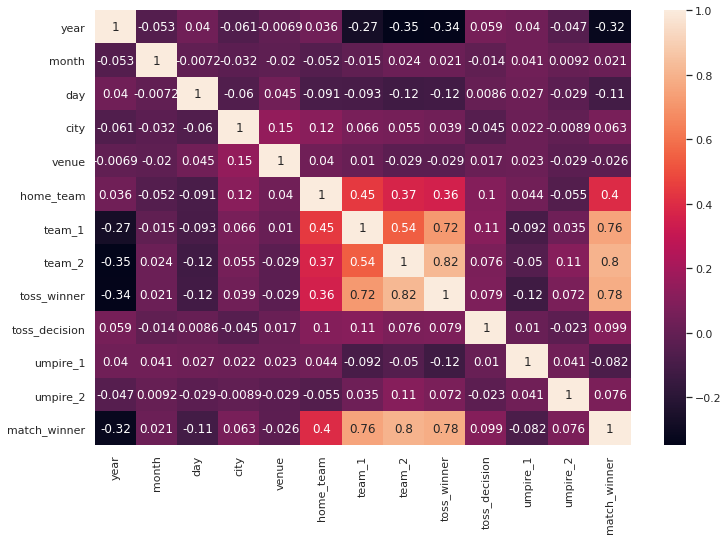

In [55]:
# Confusion Matrix

import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})
ax = sns.heatmap(t4.corr(), annot=True)

In [56]:
def correlation(dataset, threshold):
    col_corr = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold and i!=j:
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

In [57]:
t4.columns

Index(['year', 'month', 'day', 'city', 'venue', 'home_team', 'team_1',
       'team_2', 'toss_winner', 'toss_decision', 'umpire_1', 'umpire_2',
       'match_winner'],
      dtype='object')

In [58]:
corr_columns = correlation(t4, 0.15)
corr_columns = list(dict.fromkeys(corr_columns))
corr_columns

['venue', 'team_1', 'team_2', 'toss_winner', 'match_winner']

In [59]:
X = t4.drop(['match_winner', 'year', 'month', 'day', 'umpire_1', 'umpire_2'], axis = 1)
y = t4['match_winner']

In [60]:
X

,city,venue,home_team,team_1,team_2,toss_winner,toss_decision
0,6,31,77,77,72,72,0
1,99,119,70,70,72,70,0
2,58,77,71,71,77,77,1
3,15,17,72,72,71,72,0
4,6,31,77,58,77,77,1
...,...,...,...,...,...,...,...
966,0,103,0,54,36,36,1
967,2,74,90,90,70,70,1
968,0,103,0,54,36,54,0
969,2,74,90,90,70,70,1


In [61]:
y

0      72
1      70
2      77
3      72
4      77
       ..
966    54
967    90
968    54
969    90
970    54
Name: match_winner, Length: 971, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# DecisionTreeClassifier

In [101]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
print(cross_val_score(decisiontree, X, y, cv=4))

[0.44032922 0.42798354 0.42386831 0.42975207]


In [102]:
decisiontree.fit(X_train, y_train)
predictions = decisiontree.predict(X_train)
score = decisiontree.score(X_train, y_train)
print(score) # Accuracy 

0.9629120879120879


In [103]:
predictions = decisiontree.predict(X_test)
score = decisiontree.score(X_test, y_test)
print(score) # Accuracy

0.551440329218107


In [104]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  3  2]
 [ 0  0  0 ...  0 11  0]
 [ 0  0  0 ...  1  2 14]]


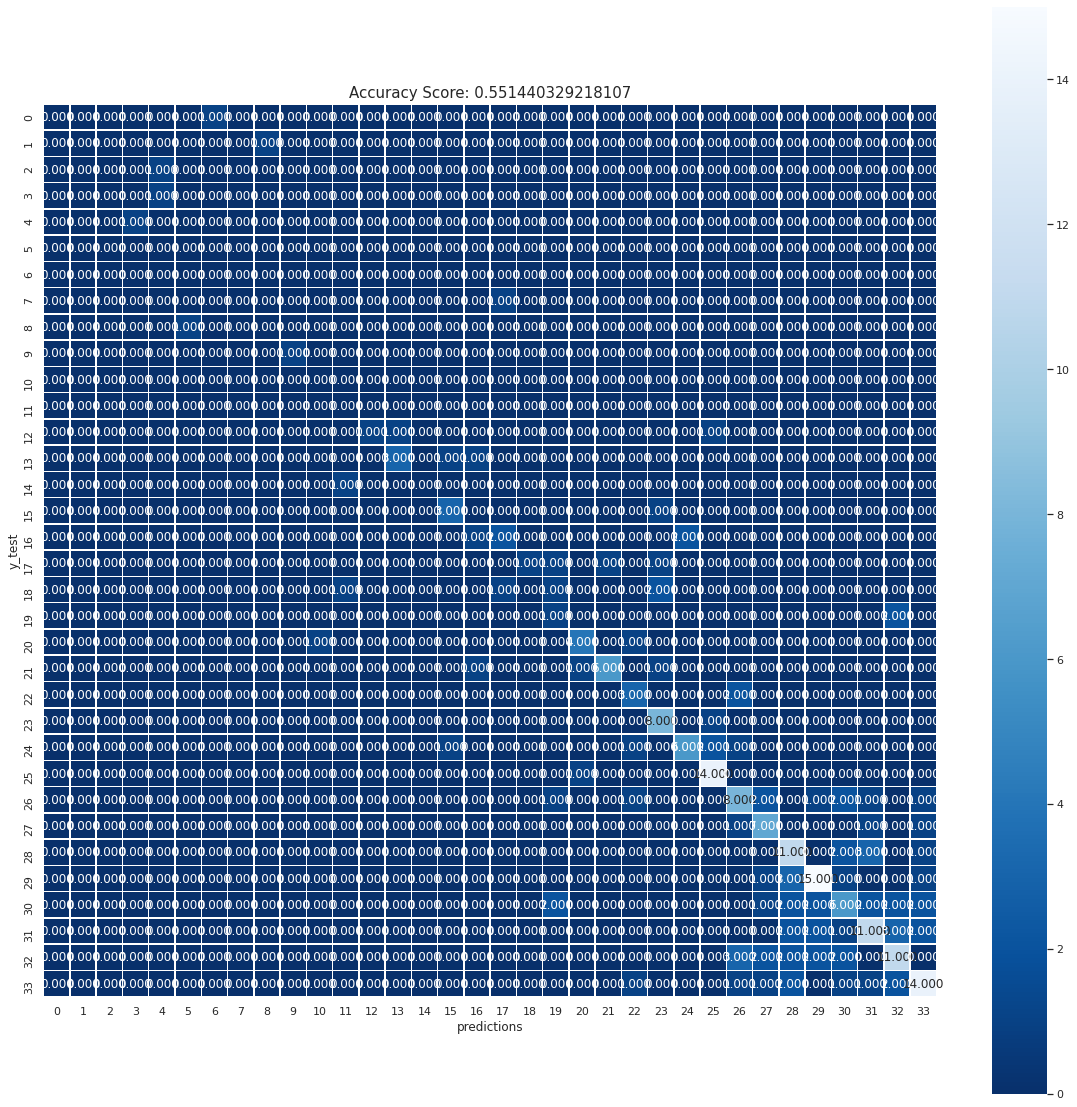

In [107]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('y_test');
plt.xlabel('predictions');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [68]:
print(metrics.classification_report(y_test, predictions))
confusion_matrix(y_test, predictions).ravel()

              precision    recall  f1-score   support

           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.50      1.00      0.67         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          20       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         1
          22       1.00      1.00      1.00         1
          26       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          29       0.50      0.33      0.40         3
          30       0.75      0.60      0.67         5
          31       0.00      0.00      0.00         1
          32       0.60      0.75      0.67         4
          33       0.33      0.20      0.25         5
          34       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([ 0,  0,  0, ...,  1,  2, 15])

In [69]:
#metrics.plot_roc_curve(decisiontree, X_test, y_test)  
#plt.show()

# Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
print(cross_val_score(randomforest, X, y, cv=3))

[0.47530864 0.5308642  0.47678019]


In [117]:
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_train)
score = randomforest.score(X_train, y_train)
print(score) # Accuracy 

0.9629120879120879


In [118]:
predictions = randomforest.predict(X_test)
score = randomforest.score(X_test, y_test)
print(score) # Accuracy

0.551440329218107


In [119]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  4  2]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  2 17]]


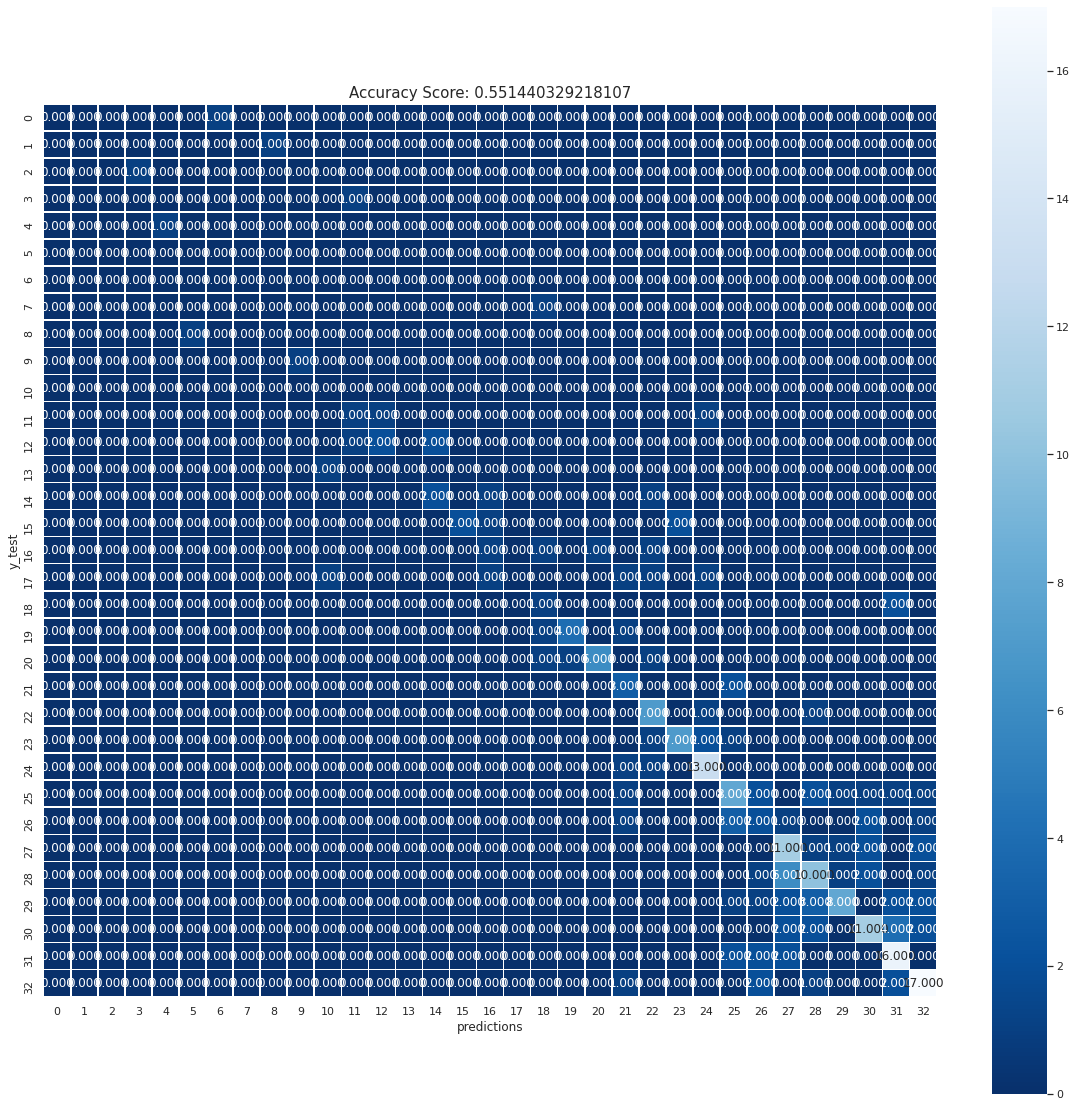

In [120]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('y_test');
plt.xlabel('predictions');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [121]:
print(metrics.classification_report(y_test, predictions))
confusion_matrix(y_test, predictions).ravel()

              precision    recall  f1-score   support

           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       1.00      1.00      1.00         1
          28       0.00      0.00      0.00         0
          29       0.33      0.33      0.33         3
          30       0.67      0.40      0.50         5
          31       0.00      0.00      0.00         1
          32       0.50      0.50      0.50         4
          33       1.00      0.40      0.57         5
          34       0.25      0.25      0.25         4
          35       0.00    

array([ 0,  0,  0, ...,  0,  2, 17])

In [76]:
#metrics.plot_roc_curve(randomforest, X_test, y_test)  
#plt.show()

# SVM

In [122]:
from sklearn import svm
supvm = svm.SVC(kernel='poly', degree=7)
print(cross_val_score(supvm, X, y, cv=3))

[0.29012346 0.32407407 0.26006192]


In [123]:
supvm.fit(X_train, y_train)
predictions = supvm.predict(X_train)
score = supvm.score(X_train, y_train)
print(score) # Accuracy 

0.7486263736263736


In [124]:
predictions = supvm.predict(X_test)
score = supvm.score(X_test, y_test)
print(score) # Accuracy 

0.36213991769547327


In [125]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  1  3]
 [ 0  0  0 ...  1 10  0]
 [ 0  0  0 ...  4  5 11]]


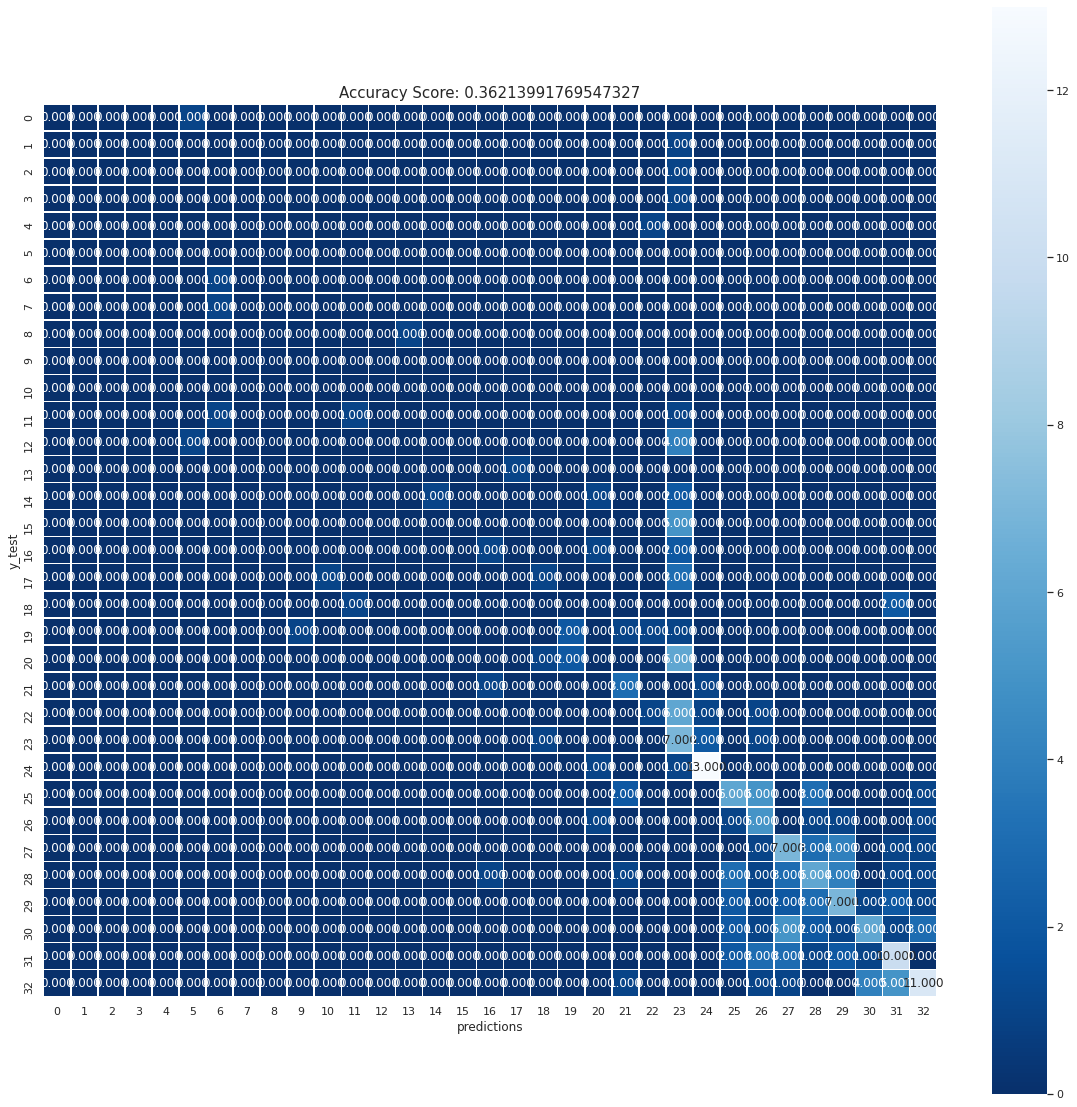

In [126]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('y_test');
plt.xlabel('predictions');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [82]:
print(metrics.classification_report(y_test, predictions))

confusion_matrix(y_test, predictions).ravel()

              precision    recall  f1-score   support

           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          20       0.33      1.00      0.50         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          29       0.50      0.33      0.40         3
          30       0.00      0.00      0.00         5
          31       0.00      0.00      0.00         1
          32       1.00      0.25      0.40         4
          33       0.00      0.00      0.00         5
          34       0.33      0.25      0.29         4
          35       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([ 0,  0,  0, ...,  4,  5, 11])

In [83]:
#metrics.plot_roc_curve(supvm, X_test, y_test)  
#plt.show()

# Prediction

In [127]:
# Decision Tree Classifier
decisiontree.fit(X_train, y_train)
predictions = decisiontree.predict(X_train)
score = decisiontree.score(X_train, y_train)
print(score) # Accuracy 

0.9629120879120879


In [153]:
# Sample Test
import re
t = test_df.sample().to_numpy().tolist()
t = str(t)[1:-1]
temp = re.findall(r'\d+', t)
res = list(map(int, temp))
print(res)
year, month, day, city, venue, home_team, team_1, team_2, toss_winner, toss_decision, umpire_1, umpire_2, match_winner = res

inp = [city, venue, home_team, team_1, team_2, toss_winner, toss_decision]


inp = np.array(inp).reshape((1, -1))
print(inp)
output = decisiontree.predict(inp)
print(output)
print(f"team_1: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(team_1)]}")
print(f"team_2: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(team_2)]}")
print(f"Actual winner is: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(match_winner)]}")
print(f"Predicted winner: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(output)]}")

[2012, 2, 23, 78, 72, 29, 29, 41, 29, 0, 124, 35, 41]
[[78 72 29 29 41 29  0]]
[41]
team_1: Kenya
team_2: Ireland
Actual winner is: Ireland
Predicted winner: Ireland


In [154]:
# Decision Tree Classifier
predictions = decisiontree.predict(X_test)
score = decisiontree.score(X_test, y_test)
print(score) # Accuracy 

0.5473251028806584


In [155]:
pd.Series(index=predictor_var, data=decisiontree.feature_importances_)

city             0.102109
venue            0.132713
home_team        0.074685
team_1           0.301671
team_2           0.281820
toss_winner      0.061129
toss_decision    0.045874
dtype: float64

In [156]:
# Random Forest Classifier
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_train)
score = randomforest.score(X_train, y_train)
print(score) # Accuracy 

0.9629120879120879


In [174]:
# Sample Test
import re
t = test_df.sample().to_numpy().tolist()
t = str(t)[1:-1]
temp = re.findall(r'\d+', t)
res = list(map(int, temp))

year, month, day, city, venue, home_team, team_1, team_2, toss_winner, toss_decision, umpire_1, umpire_2, match_winner = res

inp = [city, venue, home_team, team_1, team_2, toss_winner, toss_decision]

print(inp)
inp = np.array(inp).reshape((1, -1))
print(inp)
output = randomforest.predict(inp)
print(output)
print(f"team_1: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(team_1)]}")
print(f"team_2: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(team_2)]}")
print(f"Actual winner is: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(match_winner)]}")
print(f"Predicted winner: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(output)]}")

[60, 82, 0, 70, 58, 58, 0]
[[60 82  0 70 58 58  0]]
[58]
team_1: England
team_2: West Indies
Actual winner is: West Indies
Predicted winner: West Indies


In [175]:
# Random Forest Classifier
predictions = randomforest.predict(X_test)
score = randomforest.score(X_test, y_test)
print(score) # Accuracy 

0.522633744855967


In [176]:
pd.Series(index=predictor_var, data=randomforest.feature_importances_)

city             0.133695
venue            0.133692
home_team        0.101200
team_1           0.189609
team_2           0.218586
toss_winner      0.170990
toss_decision    0.052229
dtype: float64